In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle
import json


In [2]:
df=pd.read_csv("students_placement.csv")
df

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0
...,...,...,...,...
295,6.44,107,54,0
296,6.09,108,52,0
297,7.68,101,70,1
298,7.00,90,28,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cgpa           300 non-null    float64
 1   iq             300 non-null    int64  
 2   profile_score  300 non-null    int64  
 3   placed         300 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.5 KB


In [5]:
df.describe()

,cgpa,iq,profile_score,placed
count,300.000000,300.000000,300.000000,300.000000
mean,6.812000,102.570000,60.043333,0.506667
std,0.971568,8.326034,14.282440,0.500791
min,4.600000,83.000000,23.000000,0.000000
25%,6.010000,96.000000,51.000000,0.000000
50%,6.840000,103.500000,60.000000,1.000000
75%,7.502500,109.000000,69.000000,1.000000
max,9.300000,121.000000,100.000000,1.000000


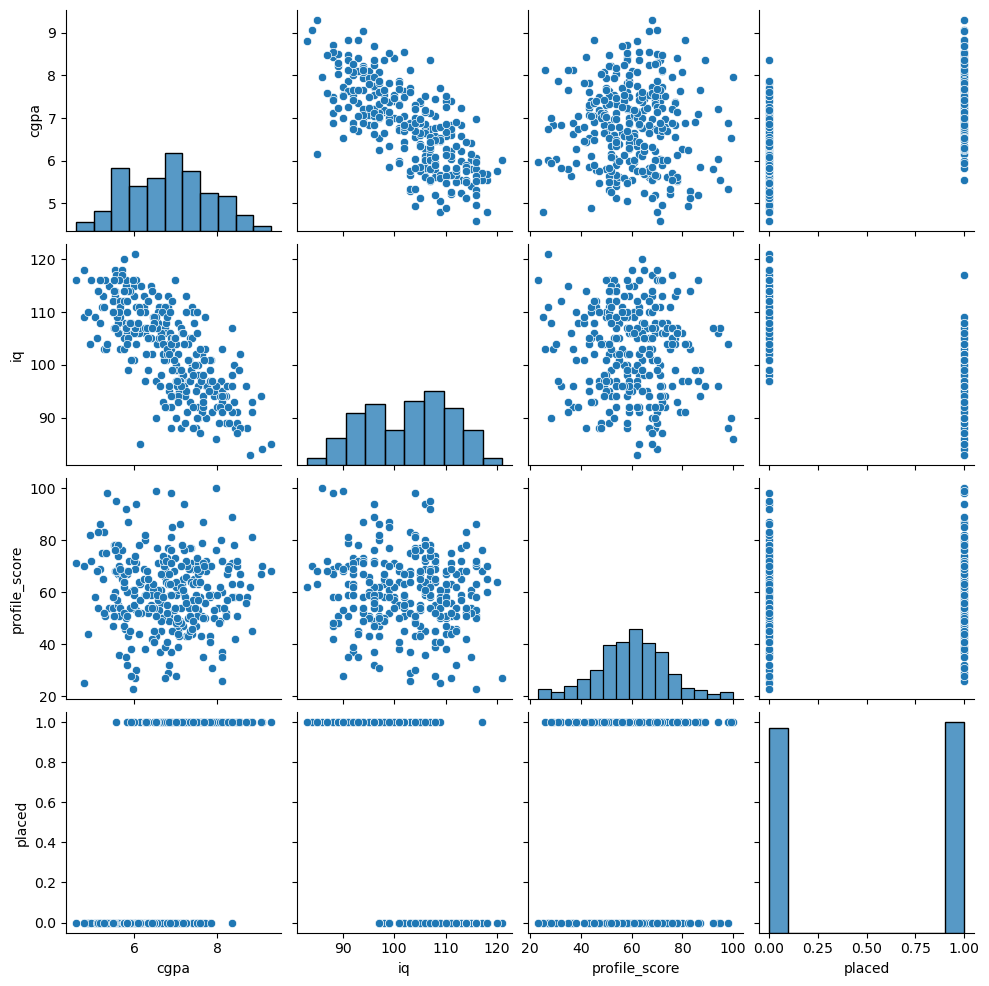

In [6]:
sns.pairplot(df)

In [9]:
x=df.drop("placed",axis=1)
y=df["placed"]
x

,cgpa,iq,profile_score
0,5.97,106,61
1,6.83,113,77
2,6.60,110,61
3,5.54,113,68
4,6.84,102,67
...,...,...,...
295,6.44,107,54
296,6.09,108,52
297,7.68,101,70
298,7.00,90,28


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train

,cgpa,iq,profile_score
248,5.94,101,38
243,5.76,120,64
289,5.83,104,51
271,7.03,97,50
36,7.93,94,53
...,...,...,...
49,7.65,94,87
144,7.01,99,64
62,7.10,97,86
34,7.55,92,63


In [12]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
y_pred=model.predict(x_train)
Accuracy=accuracy_score(y_train,y_pred)
print("Accuracy:",Accuracy)

Accuracy: 0.8875


In [15]:
with open("model.pkl","wb")as f:
    pickle.dump(model,f)

In [23]:
col=x_train.columns
col

Index(['cgpa', 'iq', 'profile_score'], dtype='object')

In [24]:
data={"columns":['cgpa', 'iq', 'profile_score']}

In [27]:
with open("project_data.json","w")as f:
    json.dump(data,f)